# Regression

In [1]:
import tensorflow as tf


In [2]:
# display tf version and test if GPU is active

tf.__version__, tf.test.gpu_device_name()

('2.6.0', '/device:GPU:0')

# Boston Housing Dataset

In [3]:
#link to data 

url = "https://raw.githubusercontent.com/paperd/tensorflow/master/chapter6/data/boston.csv"

In [4]:
#Read the dataset into a pandas dataframe


import pandas as pd

data = pd.read_csv(url)

In [5]:
# Verifying that the dataset was read properly

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Explore the Dataset

In [6]:
#Get the datatypes

data.dtypes

CRIM       float64
 ZN        float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
# Getting general info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [8]:
# Creating a dataframe that holds basic statistics with the describe method and transpose it for easier viewing

data_t = data.describe()

desc = data_t.T

In [9]:
# Target specific stats from the transposed dataframe

desc[["mean","std"]]

,mean,std
CRIM,3.613524,8.601545
ZN,11.363636,23.322453
INDUS,11.136779,6.860353
CHAS,0.069170,0.253994
NOX,0.554695,0.115878
RM,6.284634,0.702617
AGE,68.574901,28.148861
DIS,3.795043,2.105710
RAD,9.549407,8.707259
TAX,408.237154,168.537116


In [10]:
# Describe a specific feature from the original dataframe

data.describe().LSTAT

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

In [11]:
# Get columns

cols = list(data)
cols

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

# Create Feature and Target Sets

In [12]:
# create the target

# Create a copy of the dataframe

df = data.copy()

In [13]:
#Create the target

target = df.pop("MEDV")
print(target.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [14]:
#Checking to see if the data contains only the features

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


# Get Feature Names from the Features DataFrame

In [15]:
# Getting the features

feature_cols = list(df)
feature_cols

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [16]:
# Getting the number of features

len(feature_cols)

12

# Convert Features and labels

In [17]:
# Convert the pandas dataframe values to float with values method

features = df.values
labels = target.values

type(features) , type(labels)

(numpy.ndarray, numpy.ndarray)

# Split Dataset into Train and test Sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.33,random_state=0)

In [19]:
br = "\n"

print("X_train shape:",end= " ")
print(X_train.shape,br)

X_train shape: (339, 12) 



In [20]:
print("X_test shape:",end=" ")
print(X_test.shape)

X_test shape: (167, 12)


# Scale Data and Create TensorFlow Tensors

In [21]:
# scale feature data and create TensorFlow tensors

from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [23]:
train = tf.data.Dataset.from_tensor_slices((X_train_std,y_train))
test = tf.data.Dataset.from_tensor_slices((X_test_std,y_test))

In [24]:
# Function to view the first tensor

def see_samples(data,num):
  for feat, targ in data.take(num):
    print("Features: {}".format(feat),br)
    print("Target: {}".format(targ))

In [25]:
n = 1
see_samples(train,n)

Features: [-0.40069293  0.54888872 -0.899201   -0.2697866  -1.13360708  0.43514224
  0.05150692  0.8106114  -0.63095801 -0.72342494  0.24982303 -0.73612695] 

Target: 23.9


# Prepare Tensors for Training 

In [26]:
#Shuffle train data, batch, and prefetch train and test data:

BATCH_SIZE, SHUFFLE_BUFFER_SIZE = 16,100

train_bs = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)

test_bs = test.batch(BATCH_SIZE).prefetch(1)

train_bs, test_bs

(<PrefetchDataset shapes: ((None, 12), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 12), (None,)), types: (tf.float64, tf.float64)>)

# Create a Model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

In [28]:
# Clear any previous model

tf.keras.backend.clear_session()

In [29]:
#generate a seed for replication purposes
np.random.seed(0)
tf.random.set_seed(0)

In [30]:
#notice input shape accomodates 12 features!

model = Sequential([Dense(64,activation="relu",input_shape=[12,]), Dense(64,activation="relu"),Dense(1)])

# Model Summary

In [31]:
# inspect the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [32]:
rmse = tf.keras.metrics.RootMeanSquaredError()

In [33]:
model.compile(loss="mse",optimizer="RMSProp",metrics=[rmse,"mae","mse"])

# Train the model

In [34]:
# Train the model for 50 epochs

history = model.fit(train_bs,epochs=50,validation_data=test_bs)

Epoch 1/50
22/22 [==============================] - 2s 10ms/step - loss: 524.1789 - root_mean_squared_error: 22.8950 - mae: 20.9431 - mse: 524.1789 - val_loss: 398.7612 - val_root_mean_squared_error: 19.9690 - val_mae: 17.9517 - val_mse: 398.7612
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 353.5099 - root_mean_squared_error: 18.8019 - mae: 16.7964 - mse: 353.5099 - val_loss: 234.4034 - val_root_mean_squared_error: 15.3102 - val_mae: 13.1708 - val_mse: 234.4034
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 190.1635 - root_mean_squared_error: 13.7900 - mae: 11.6666 - mse: 190.1635 - val_loss: 116.8134 - val_root_mean_squared_error: 10.8080 - val_mae: 8.6684 - val_mse: 116.8134
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 90.8962 - root_mean_squared_error: 9.5339 - mae: 7.5803 - mse: 90.8962 - val_loss: 65.8033 - val_root_mean_squared_error: 8.1119 - val_mae: 6.2822 - val_mse: 65.8033
Epoch 5/50
22/22 [======

# Visualize Training

In [35]:
#Create a variable hist to hold the models history as a pandas dataframe 
#Create another variable hist["epoch"] to hold epoch history

hist = pd.DataFrame(history.history)

hist["epoch"] = history.epoch

hist.tail()

,loss,root_mean_squared_error,mae,mse,val_loss,val_root_mean_squared_error,val_mae,val_mse,epoch
45,7.506485,2.739796,2.004797,7.506485,19.580786,4.425018,3.408155,19.580786,45
46,7.321955,2.705911,1.991840,7.321955,19.033459,4.362735,3.316041,19.033459,46
47,7.350197,2.711125,1.974332,7.350197,19.071629,4.367107,3.273284,19.071629,47
48,7.106912,2.665879,1.955118,7.106912,15.928192,3.991014,2.930404,15.928192,48
49,7.254157,2.693354,1.954962,7.254157,16.225853,4.028132,2.966649,16.225853,49


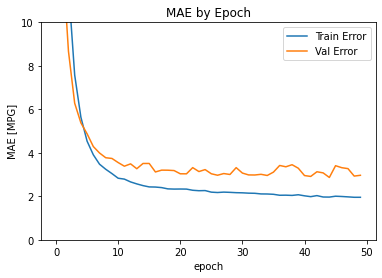

<Figure size 432x288 with 0 Axes>

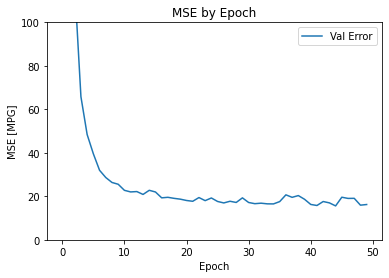

<Figure size 432x288 with 0 Axes>

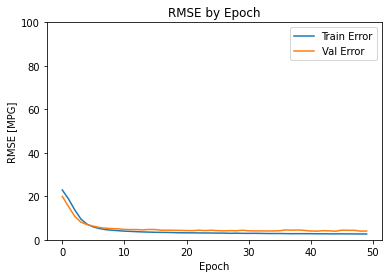

In [36]:
# Build the plots 


import matplotlib.pyplot as plt

def plot_history(history,limit1,limit2):
  hist = pd.DataFrame(history.history)
  hist["epoch"] = history.epoch

  plt.figure()
  plt.xlabel("epoch")
  plt.ylabel("MAE [MPG]")
  plt.plot(hist["epoch"],hist["mae"],label= "Train Error")
  plt.plot(hist["epoch"],hist["val_mae"],label = "Val Error")
  plt.ylim([0,limit1])
  plt.legend()
  plt.title("MAE by Epoch")
  plt.show()
  plt.clf()

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("MSE [MPG]")
  plt.plot(hist["epoch"],hist["val_mse"],label= "Val Error")
  plt.ylim([0,limit2])
  plt.legend()
  plt.title("MSE by Epoch")
  plt.show()
  plt.clf()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('RMSE [MPG]')
  plt.plot(hist['epoch'], hist['root_mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_root_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0, limit2])
  plt.legend()
  plt.title('RMSE by Epoch')
  plt.show()


#set limits to make plot readable

mae_limit, mse_limit = 10, 100

plot_history(history, mae_limit, mse_limit)


# Early Stopping

In [37]:
# clear the previous model

tf.keras.backend.clear_session()

In [38]:
# generate a seed for replication purposes

np.random.seed(0)
tf.random.set_seed(0)

In [39]:
# monitor "val_loss" for early stopping

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss")

history = model.fit(train_bs,epochs=50,validation_data=test_bs,callbacks=[early_stop])

Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 6.9132 - root_mean_squared_error: 2.6293 - mae: 1.9455 - mse: 6.9132 - val_loss: 17.5535 - val_root_mean_squared_error: 4.1897 - val_mae: 3.1494 - val_mse: 17.5535


In [40]:
# setting the patience parameter to a given number of epochs after which training will be stopped if there's no improvement

#clear the previous model

tf.keras.backend.clear_session()

In [41]:
# generate a seed for replication purposes

np.random.seed(0)
tf.random.set_seed(0)

In [42]:
# set the number of patience epochs
n = 4

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=n)

history = model.fit(train_bs,epochs=50,validation_data=test_bs,callbacks=[early_stop])

Epoch 1/50
22/22 [==============================] - 0s 6ms/step - loss: 6.8842 - root_mean_squared_error: 2.6238 - mae: 1.9109 - mse: 6.8842 - val_loss: 16.2491 - val_root_mean_squared_error: 4.0310 - val_mae: 2.8776 - val_mse: 16.2491
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 6.6603 - root_mean_squared_error: 2.5808 - mae: 1.8930 - mse: 6.6603 - val_loss: 15.4717 - val_root_mean_squared_error: 3.9334 - val_mae: 2.8769 - val_mse: 15.4717
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 6.8663 - root_mean_squared_error: 2.6204 - mae: 1.9157 - mse: 6.8663 - val_loss: 16.8740 - val_root_mean_squared_error: 4.1078 - val_mae: 3.0302 - val_mse: 16.8740
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 6.6112 - root_mean_squared_error: 2.5712 - mae: 1.8528 - mse: 6.6112 - val_loss: 15.6777 - val_root_mean_squared_error: 3.9595 - val_mae: 2.9346 - val_mse: 15.6777
Epoch 5/50
22/22 [==============================] - 0s 4

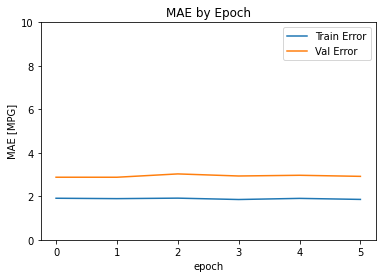

<Figure size 432x288 with 0 Axes>

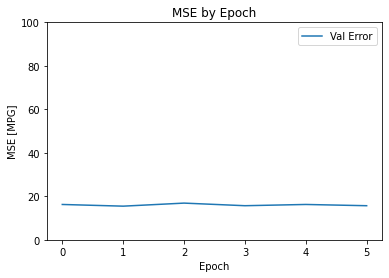

<Figure size 432x288 with 0 Axes>

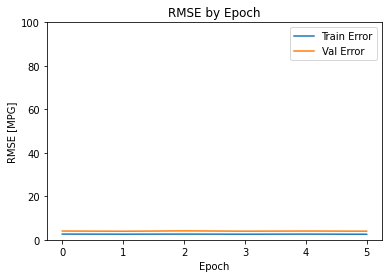

In [43]:
# Visualizing the data

hist = pd.DataFrame(history.history)

hist["epoch"] = history.epoch

train_limit, test_limit = 10, 100
plot_history(history,train_limit,test_limit)

# Removing Bad Data

## Getting Data

In [44]:
# get the raw data

url = "https://raw.githubusercontent.com/paperd/tensorflow/master/chapter6/data/boston.csv"

boston = pd.read_csv(url)

In [45]:
#Verify data

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Removing Noise

In [46]:
# Removing the bad data which hopefully reduces inherent noise

print("data set before removing noise:",boston.shape)

#remove noise

noise = boston.loc[boston["MEDV"] >= 50]
data = boston.drop(noise.index)

print("data set without noise:",data.shape)

data set before removing noise: (506, 13)
data set without noise: (490, 13)


# Create Feature and Target Data

In [47]:
#creating feature and target sets

#create a copy of the dataframe

df = data.copy()

#create feature and target sets


target, features = df.pop("MEDV"), df.values

labels = target.values

# Build the Input Pipeline

In [48]:
# Splitting the data into training and test data

X_train , X_test, y_train , y_test = train_test_split(features,labels,test_size=0.33,random_state=0)

In [49]:
#standardize feature data and create TensorFlow tensors

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [50]:
#slice data for TensorFlow consumption

train = tf.data.Dataset.from_tensor_slices((X_train_std,y_train))

test = tf.data.Dataset.from_tensor_slices((X_test_std,y_test))

In [51]:
#shuffle, batch, prefetch
BATCH_SIZE = 16

SHUFFLE_BUFFER_SIZE = 100

train_n = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)

test_n = test.batch(BATCH_SIZE).prefetch(1)

In [52]:
# Inspect tensors

train_n,test_n

(<PrefetchDataset shapes: ((None, 12), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 12), (None,)), types: (tf.float64, tf.float64)>)

# Compile and Train

In [53]:
rmse = tf.keras.metrics.RootMeanSquaredError()

model.compile(loss="mse",optimizer="RMSProp",metrics=[rmse,"mae","mse"])

In [54]:
tf.keras.backend.clear_session()

In [55]:
#generate a seed for replication purposes

np.random.seed(0)
tf.random.set_seed(0)

In [56]:
n = 4

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=n)

In [57]:
history = model.fit(train_n,epochs=50,validation_data=test_n,callbacks=[early_stop])

Epoch 1/50
21/21 [==============================] - 1s 10ms/step - loss: 5.9542 - root_mean_squared_error: 2.4401 - mae: 1.8792 - mse: 5.9542 - val_loss: 11.8707 - val_root_mean_squared_error: 3.4454 - val_mae: 2.5284 - val_mse: 11.8707
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 5.5795 - root_mean_squared_error: 2.3621 - mae: 1.8291 - mse: 5.5795 - val_loss: 11.8934 - val_root_mean_squared_error: 3.4487 - val_mae: 2.5277 - val_mse: 11.8934
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 5.2169 - root_mean_squared_error: 2.2841 - mae: 1.7552 - mse: 5.2169 - val_loss: 11.6244 - val_root_mean_squared_error: 3.4095 - val_mae: 2.4984 - val_mse: 11.6244
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 5.3202 - root_mean_squared_error: 2.3066 - mae: 1.7653 - mse: 5.3202 - val_loss: 13.4677 - val_root_mean_squared_error: 3.6698 - val_mae: 2.7421 - val_mse: 13.4677
Epoch 5/50
21/21 [==============================] - 0s 

# Visualize

In [58]:
# Plot results

hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

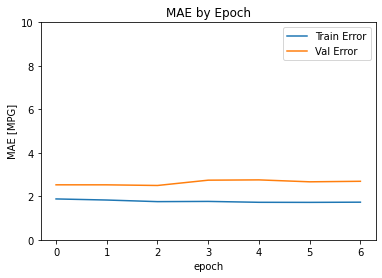

<Figure size 432x288 with 0 Axes>

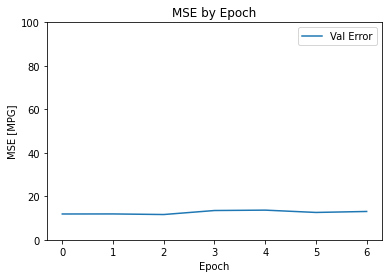

<Figure size 432x288 with 0 Axes>

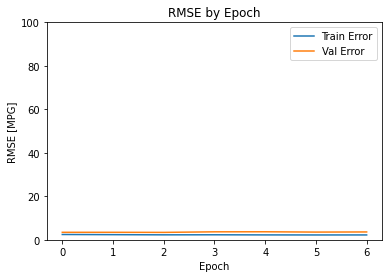

In [59]:
train_limit, test_limit = 10 , 100

plot_history(history,train_limit,test_limit)

# Generalize on Test Data

In [60]:
# Evaluate
loss, rmse, mae, mse = model.evaluate(test_n,verbose=2)

11/11 - 0s - loss: 13.0290 - root_mean_squared_error: 3.6096 - mae: 2.6911 - mse: 13.0290


In [61]:
print()

print("Testing set Mean Abs Error: {:5.2f} thousands dollars".format(mae))


Testing set Mean Abs Error:  2.69 thousands dollars


# Make Predictions

In [62]:
# Using the predict method to make predictions from processed test data test_n

predictions = model.predict(test_n)

In [63]:
# Display the first prediction

first  = predictions[0]

print("predicted price:", first[0],"thousand")

predicted price: 18.37235 thousand


In [64]:
#actual housing price

print("actual price:",y_test[0],"thousand")

actual price: 24.3 thousand


In [65]:
# Compare predicted and actual prices to gauage model performance

five = predictions[:5]
actuals = y_test[:5]
print ('pred', 'actual')
for i, p in enumerate(range(5)):
  print (np.round(five[i][0],1), actuals[i])

pred actual
18.4 24.3
27.5 32.5
17.3 17.8
20.1 19.5
18.2 19.9


# Visualize Predictions

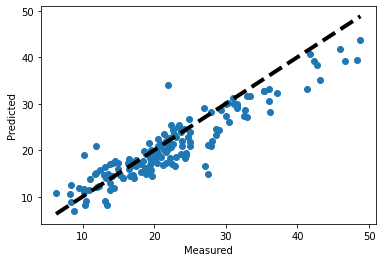

In [66]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()],\
        [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Load Boston Data from Scikit-Learn

In [67]:
from sklearn import datasets

In [68]:
dataset = datasets.load_boston()

data, target = dataset.data , dataset.target

In [69]:
# Access keys

dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [70]:
# The list of keys informs us about accessing feature names

feature_names = dataset.feature_names

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [71]:
df_sklearn = pd.DataFrame(dataset.data,columns=feature_names)

In [72]:
df_sklearn["MEDV"] = dataset.target

df_sklearn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
#checking info 

df_sklearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Remove Noise

In [74]:
# remove noisy data

print("dataset before removing noise:",df_sklearn.shape)

noise = df_sklearn.loc[df_sklearn["MEDV"] >= 50]

df_clean = df_sklearn.drop(noise.index)

print("data set without noise:",df_clean.shape)

dataset before removing noise: (506, 14)
data set without noise: (490, 14)


# Build the input pipeline 

In [75]:
# create a copy of the dataframe

df = df_clean.copy()

In [76]:
# create the target 

target = df.pop("MEDV")

In [77]:
# convert features and target data

features = df.values

labels = target.values

In [78]:
# create train and test sets

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.33,random_state=0)

In [79]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [80]:
# Slice data into a TensorFlow consumable form

train = tf.data.Dataset.from_tensor_slices((X_train_std,y_train))
test = tf.data.Dataset.from_tensor_slices((X_test_std,y_test))

In [81]:
# finalize the pipeline

BATCH_SIZE = 16

SHUFFLE_BUFFER_SIZE = 100


In [82]:
train_sk = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_sk = test.batch(BATCH_SIZE).prefetch(1)

# Model Data

In [83]:
# clear any previous model

tf.keras.backend.clear_session()

In [84]:
# generate a seed for replication purposes

np.random.seed(0)
tf.random.set_seed(0)

In [85]:
# new model with 13 input features

model = Sequential([Dense(64,activation="relu",input_shape=[13,]),Dense(64,activation="relu"),Dense(1) ])

In [86]:
# compile the new model

rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss="mse",optimizer="RMSProp",metrics=[rmse,"mae","mse"])

In [87]:
#train

n = 4

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=n)


In [88]:
history = model.fit(train_sk,epochs=50,validation_data=test_sk,callbacks=[early_stop])

Epoch 1/50
21/21 [==============================] - 1s 9ms/step - loss: 440.2187 - root_mean_squared_error: 20.9814 - mae: 19.5411 - mse: 440.2187 - val_loss: 410.3664 - val_root_mean_squared_error: 20.2575 - val_mae: 18.2349 - val_mse: 410.3664
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 298.1175 - root_mean_squared_error: 17.2661 - mae: 15.6393 - mse: 298.1175 - val_loss: 256.9550 - val_root_mean_squared_error: 16.0298 - val_mae: 13.8110 - val_mse: 256.9550
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 160.1362 - root_mean_squared_error: 12.6545 - mae: 11.1101 - mse: 160.1362 - val_loss: 129.3776 - val_root_mean_squared_error: 11.3744 - val_mae: 9.2544 - val_mse: 129.3776
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 72.2217 - root_mean_squared_error: 8.4983 - mae: 7.1169 - mse: 72.2217 - val_loss: 69.5258 - val_root_mean_squared_error: 8.3382 - val_mae: 6.7452 - val_mse: 69.5258
Epoch 5/50
21/21 [=======

# Model Cars

In [89]:
cars_url = 'https://raw.githubusercontent.com/paperd/tensorflow/\
master/chapter6/data/cars.csv'

In [90]:
# Read data into pandas dataframe

cars = pd.read_csv(cars_url)

In [91]:
# Verify data

cars.head()

,Car,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [92]:
# Get info about the dataset

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  406 non-null    float64
 4   HP            406 non-null    int64  
 5   Weight        406 non-null    int64  
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.7+ KB


# Convert Categorical Column to Numeric

In [93]:
# Create a copy of the dataframe

df = cars.copy()


origin = df.pop("Origin")

In [94]:
# Define one-hot encoded feature columns for US, Europe, and Japanese cars

df["US"] = (origin == "US") * 1.0
df["Europe"] = (origin == "Europe") * 1.0
df["Japan"] = (origin == "Japan") * 1.0

df.tail(8)

,Car,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Model,US,Europe,Japan
398,Toyota Celica GT,32.0,4,144.0,96,2665,13.9,82,0.0,0.0,1.0
399,Dodge Charger 2.2,36.0,4,135.0,84,2370,13.0,82,1.0,0.0,0.0
400,Chevrolet Camaro,27.0,4,151.0,90,2950,17.3,82,1.0,0.0,0.0
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,1.0,0.0,0.0
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,0.0,1.0,0.0
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,1.0,0.0,0.0
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,1.0,0.0,0.0
405,Chevy S-10,31.0,4,119.0,82,2720,19.4,82,1.0,0.0,0.0


In [95]:
#Using the built in one-hot encoding method in pandas

# create a copy of the dataframe

alt = cars.copy()

In [96]:
# one-hot encode

# get one hot encoding of columns "Origin"

one_hot = pd.get_dummies(alt["Origin"])

In [97]:
# Drop the original column

#dropping the column

alt = alt.drop("Origin",axis=1)

In [98]:
# Join the encoded column to the dataframe

# join the encoded df

alt = alt.join(one_hot)
alt.tail(8)

,Car,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Model,Europe,Japan,US
398,Toyota Celica GT,32.0,4,144.0,96,2665,13.9,82,0,1,0
399,Dodge Charger 2.2,36.0,4,135.0,84,2370,13.0,82,0,0,1
400,Chevrolet Camaro,27.0,4,151.0,90,2950,17.3,82,0,0,1
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,0,0,1
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,1,0,0
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,0,0,1
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,0,0,1
405,Chevy S-10,31.0,4,119.0,82,2720,19.4,82,0,0,1


# Slice Extraneous Data

In [99]:
try:
  name = df.pop("Car")
except:
  print("Car not found")

In [100]:
# Verify

df.tail(8)

,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Model,US,Europe,Japan
398,32.0,4,144.0,96,2665,13.9,82,0.0,0.0,1.0
399,36.0,4,135.0,84,2370,13.0,82,1.0,0.0,0.0
400,27.0,4,151.0,90,2950,17.3,82,1.0,0.0,0.0
401,27.0,4,140.0,86,2790,15.6,82,1.0,0.0,0.0
402,44.0,4,97.0,52,2130,24.6,82,0.0,1.0,0.0
403,32.0,4,135.0,84,2295,11.6,82,1.0,0.0,0.0
404,28.0,4,120.0,79,2625,18.6,82,1.0,0.0,0.0
405,31.0,4,119.0,82,2720,19.4,82,1.0,0.0,0.0


# Create Features and Labels

In [101]:
# Create feature and target sets as shown

# create dataset

features = df.copy()
target = features.pop("MPG")

In [102]:
#get features names

feature_cols = list(features)
print(feature_cols)

['Cylinders', 'Displacement', 'HP', 'Weight', 'Acceleration', 'Model', 'US', 'Europe', 'Japan']


In [103]:
# get number of features

num_features = len(feature_cols)
print(num_features)

9


In [104]:
# convert feature and target data to numpy arrays
features = features.values
labels = target.values

type(features), type(labels)

(numpy.ndarray, numpy.ndarray)

# Build the input Pipeline

In [105]:
# split

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.33,random_state=0)

In [106]:
print("X_train shape:",end= " ")
print(X_train.shape,br)

print("X_test shape:",end=" ")
print(X_test.shape)

X_train shape: (272, 9) 

X_test shape: (134, 9)


In [107]:
# scale 

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)


In [108]:
#Slice

train = tf.data.Dataset.from_tensor_slices((X_train_std,y_train))
test = tf.data.Dataset.from_tensor_slices((X_test_std,y_test))

In [109]:
#shuffle, batch, prefetch

BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

In [110]:
train_cars = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)

test_cars = test.batch(BATCH_SIZE).prefetch(1)

In [111]:
# Inspect tensors

train_cars,test_cars

(<PrefetchDataset shapes: ((None, 9), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 9), (None,)), types: (tf.float64, tf.float64)>)

# Model Data

In [112]:
# clear any previous model

tf.keras.backend.clear_session()

In [113]:
#create the model

model = Sequential([Dense(64,activation="relu",input_shape=[num_features]),Dense(64,activation="relu"),Dense(1)])

In [114]:
#compile 

rmse = tf.keras.metrics.RootMeanSquaredError()
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [115]:
model.compile(loss="mse",optimizer=optimizer,metrics=[rmse,"mae","mse"])

In [116]:
#train

tf.keras.backend.clear_session()

n = 4
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=n)

In [117]:
car_history = model.fit(train_cars,epochs=100,validation_data=test_cars,callbacks=[early_stop])

Epoch 1/100
17/17 [==============================] - 1s 11ms/step - loss: 560.7333 - root_mean_squared_error: 23.6798 - mae: 22.3639 - mse: 560.7333 - val_loss: 519.6949 - val_root_mean_squared_error: 22.7968 - val_mae: 21.1949 - val_mse: 519.6949
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 457.2351 - root_mean_squared_error: 21.3831 - mae: 20.1591 - mse: 457.2351 - val_loss: 408.7993 - val_root_mean_squared_error: 20.2188 - val_mae: 18.8237 - val_mse: 408.7993
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 339.4957 - root_mean_squared_error: 18.4254 - mae: 17.2959 - mse: 339.4957 - val_loss: 285.8695 - val_root_mean_squared_error: 16.9077 - val_mae: 15.6975 - val_mse: 285.8695
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 218.0342 - root_mean_squared_error: 14.7660 - mae: 13.6286 - mse: 218.0342 - val_loss: 173.6996 - val_root_mean_squared_error: 13.1795 - val_mae: 11.8906 - val_mse: 173.6996
Epoch 5/100

# Inspect the Model

In [118]:
#summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


# Visualize Training

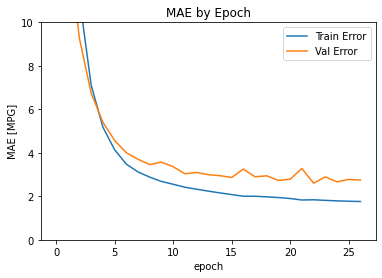

<Figure size 432x288 with 0 Axes>

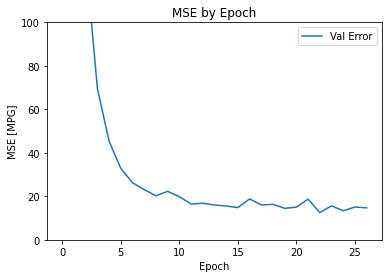

<Figure size 432x288 with 0 Axes>

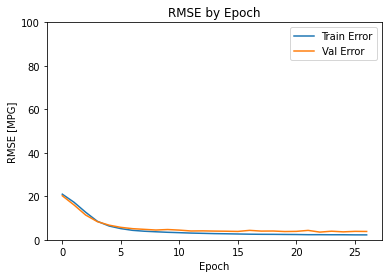

In [119]:
# Visualize

hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

train_limit, test_limit = 10,100

plot_history(history,train_limit,test_limit)

# Generalize on Test Data

In [120]:
# Generalize

loss, rmse, mae, mse = model.evaluate(test_cars,verbose=2)

print()
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

9/9 - 0s - loss: 25.0402 - root_mean_squared_error: 5.0040 - mae: 2.9020 - mse: 25.0402

Testing set Mean Abs Error:  2.90 MPG


# Make Predictions

In [121]:
# Predictions

predictions = model.predict(test_cars)

# Visualize Predictions

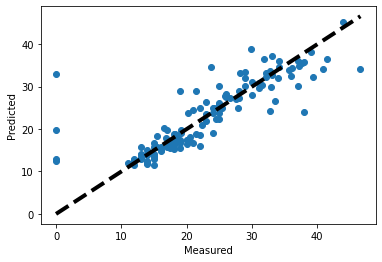

In [122]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()],\
        [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()